
# EDA — Credit Card Fraud Detection


Este notebook contém a **Análise Exploratória de Dados (EDA)** orientada a Data Science para o dataset de detecção de fraudes em cartão de crédito.

**Objetivos**:
- Entender distribuições e desbalanceamento da variável target `Class`.
- Investigar a distribuição de `Amount` e relações com `Class`.
- Verificar correlações e relações entre features (V1..V28 somando à engineering).
- Produzir visualizações que suportem escolhas de modelagem.

> Observação: execute as células em ordem. Este notebook assume que o arquivo `data/creditcard.csv` está disponível no diretório do projeto.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
#DATA_PATH = os.path.join("credit_card_ml_project/data","creditcard.csv")
DATA_PATH = os.path.join("..", "credit_card_ml_project", "data", "creditcard.csv")
print("Reading data from", DATA_PATH)
df = pd.read_csv(DATA_PATH)
df.shape


Reading data from ../credit_card_ml_project/data/creditcard.csv


(284807, 31)

In [3]:

# Quick look
display(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Class'].value_counts(normalize=False))
print("\nClass distribution (relative):\n", df['Class'].value_counts(normalize=True))


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


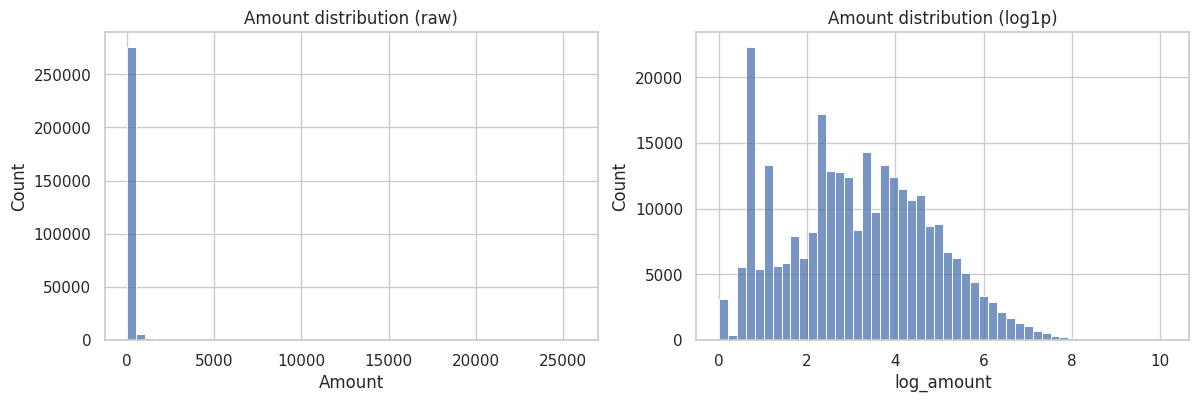

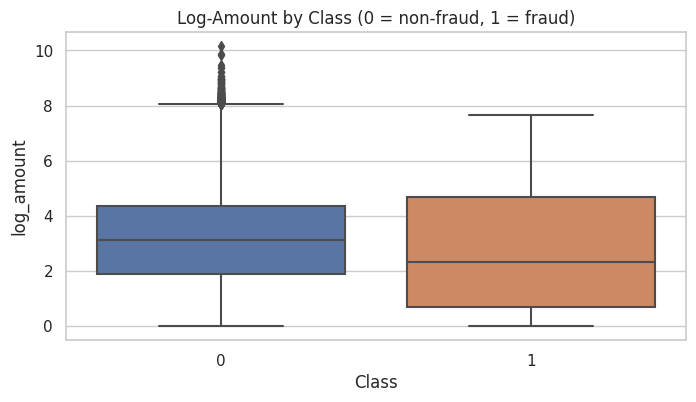

In [ ]:

# Amount distributions and log transform
df['log_amount'] = np.log1p(df['Amount'])
fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df['Amount'], bins=50, ax=axes[0])
axes[0].set_title('Amount distribution (raw)')
sns.histplot(df['log_amount'], bins=50, ax=axes[1])
axes[1].set_title('Amount distribution (log1p)')
plt.show()

# Boxplot amount by class
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='log_amount', data=df)
plt.title('Valor em escala logarítmica por classe (0 = não fraude, 1 = fraude)')
plt.show()


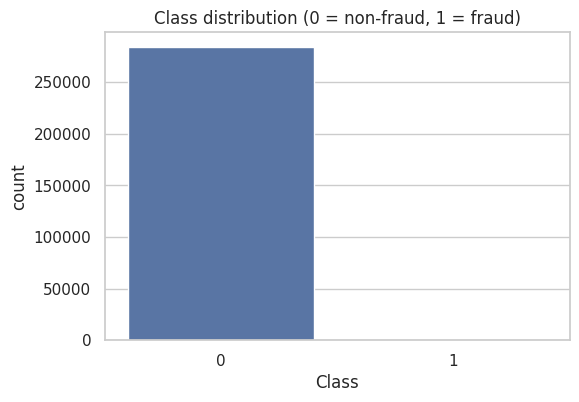

Percentage of fraud: 0.1727%


In [ ]:

# Class counts
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Classe de distribuição(0 = não-fraude, 1 = fraude)')
plt.show()

# Percentage of fraud
fraud_pct = df['Class'].mean() * 100
print(f"Porcentagem de fraude: {fraud_pct:.4f}%")


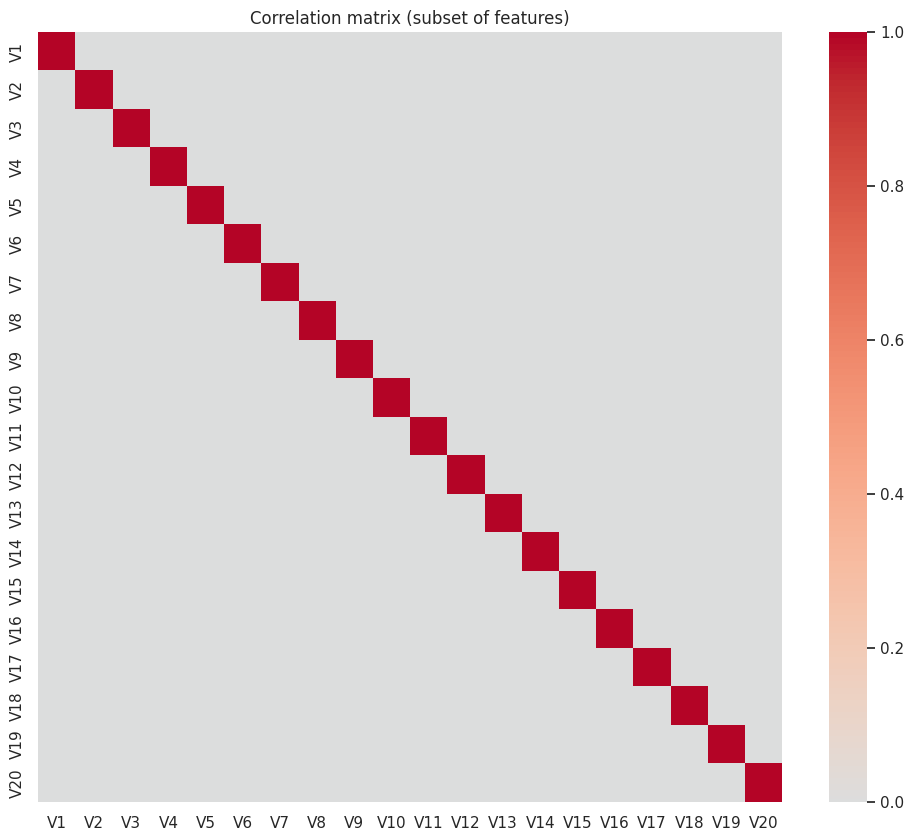

In [ ]:

# Correlation matrix for first 15 features (V1..V15 + Amount + Time)
cols = [c for c in df.columns if c.startswith('V')] + ['Amount','log_amount','Time']
cols = cols[:20]
corr = df[cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de correlação (subconjunto de variáveis)')
plt.show()


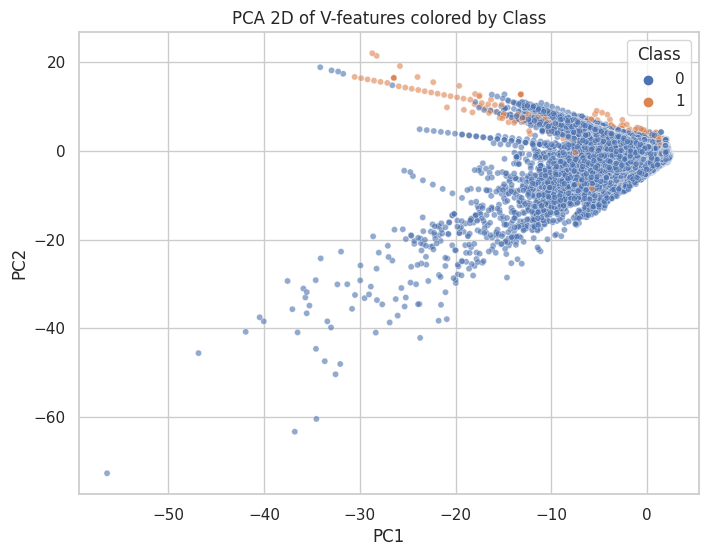

Explained variance ratio (PC1, PC2): [0.12483757 0.08872945]


In [ ]:

# PCA to visualize separability (using V1..V28 if present)
vcols = [c for c in df.columns if c.startswith('V')][:28]
X = df[vcols].fillna(0).values
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=df['Class'], palette=['C0','C1'], alpha=0.6, s=20)
plt.title('PCA 2D das variáveis V, com cores representando a classe (fraude/não fraude)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(title='Class')
plt.show()

print("Variância explicada pela variância de PC1 e PC2:", pca.explained_variance_ratio_[:2])


Loading model from: /home/paulo/Documentos/meus_codigos/ph_codes/python/credit_card_ml_project_with_eda/credit_card_ml_project/models/model.joblib


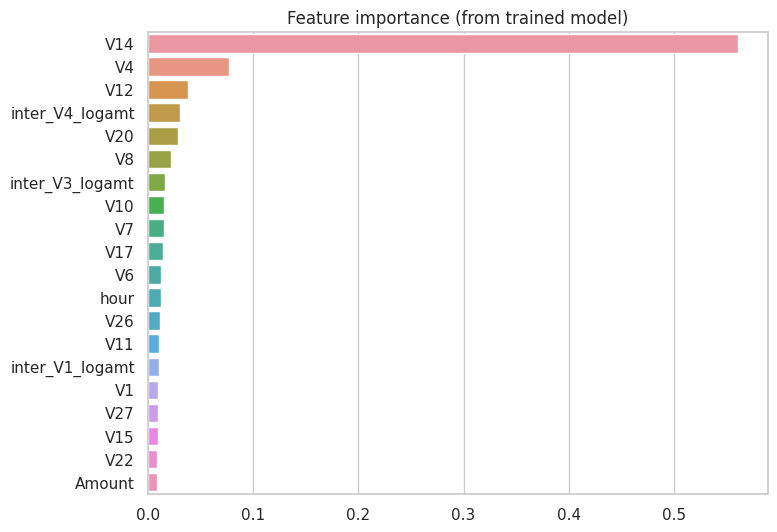

If you trained the model, uncomment code to plot feature importances.


In [ ]:

import joblib
MODEL_PATH = os.path.join("..", "credit_card_ml_project", "models", "model.joblib")
print("Carregando do modelo:", os.path.abspath(MODEL_PATH))
art = joblib.load(MODEL_PATH)
#art = joblib.load('models/model.joblib')
model = art['model'] if isinstance(art, dict) else art
if hasattr(model, 'feature_importances_'):
     import numpy as np
     imp = model.feature_importances_
     names = art['features'] if isinstance(art, dict) and 'features' in art else df.columns.drop('Class')
     idx = np.argsort(imp)[-20:][::-1]
     plt.figure(figsize=(8,6))
     sns.barplot(x=imp[idx], y=[names[i] for i in idx])
     plt.title('Feature importance (from trained model)')
     plt.show()



## Interpretação e decisões de modelagem


- O dataset apresenta **desbalanceamento acentuado** (classe 1 muito rara). Por isso, **métricas como ROC-AUC, Precision, Recall e F1-score** são mais informativas que acurácia.


- A transformação `log1p(Amount)` reduz assimetria e é útil em comparações entre classes.


- PCA demonstra visualmente a separabilidade (ou ausência dela) nas duas primeiras componentes — isso ajuda a decidir entre modelos lineares e baseados em árvores.


- Modelos baseados em gradiente (XGBoost, LightGBM) geralmente funcionam muito bem em dados tabulares e toleram bem features com diferentes escalas e outliers; além disso permitem extrair importância de features para explicar decisões.


- Recomenda-se usar **validação estratificada** e ajustar `scale_pos_weight` (ou usar técnicas de amostragem) para lidar com o desbalanceamento.


